In [1]:
#single label multi-class classification using Reuters newswires 

In [2]:
# import dataset and unpack
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2022-10-24 21:03:24.496550: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
len(train_data), len(test_data)

(8982, 2246)

In [4]:
# as with IMDB dataset, test is encoded with integer indices
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
# decoding the first newswire for demo purposes
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for key, value in word_index.items()])
decoded_newswire = ' '.join(reverse_word_index.get(i - 3, '_') for i in train_data[0])

decoded_newswire

'_ _ _ said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [6]:
# labels range from 0 to 45, 46 classes/topics total
train_labels[0]

3

In [9]:
# helper function to vectorize data as binary masks (one-hot encoding a.k.a categorical encoding)
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
# we can apply the same function to the labels, since they are multi-class
x_labels = vectorize_sequences(train_labels, dimension=46)
y_labels = vectorize_sequences(test_labels, dimension=46)

x_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
# keras has a built-in function that does the same (notice the data type difference)
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

one_hot_train_labels[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [20]:
# model with 64-unit layers, since 16 units is too restrictive for a 46-class classification problem.
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [21]:
# using 'categorical_crossentropy' as a loss function, since classification is no longer binary
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [22]:
# split test set into (partial) test and validation sets
validation_size = 1000
x_val = x_train[:validation_size]
partial_x_train = x_train[validation_size:]

y_val = one_hot_train_labels[:validation_size]
partial_y_train = one_hot_train_labels[validation_size:]

In [23]:
# train model
history = model.fit(partial_x_train,
                    partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 28ms/step - loss: 2.4964 - accuracy: 0.5492 - val_loss: 1.6726 - val_accuracy: 0.6390
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.3881 - accuracy: 0.7046 - val_loss: 1.2946 - val_accuracy: 0.7140
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.0542 - accuracy: 0.7770 - val_loss: 1.1487 - val_accuracy: 0.7420
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8322 - accuracy: 0.8237 - val_loss: 1.0379 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: 0.6552 - accuracy: 0.8627 - val_loss: 0.9636 - val_accuracy: 0.8070
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5227 - accuracy: 0.8896 - val_loss: 0.9200 - val_accuracy: 0.8150
Epoch 7/20
16/16 [==============================] - 0s 14ms/step - loss: 0.4174 - accuracy: 0.9122 - val_loss: 0.9592 - val_accuracy: 0.7960
Epoch 8/20
16

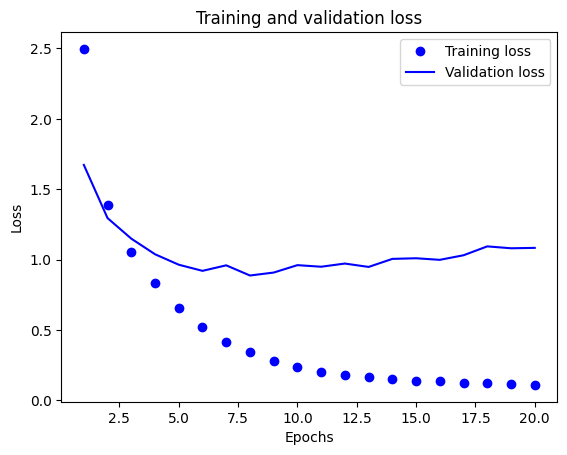

In [29]:
# plot training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

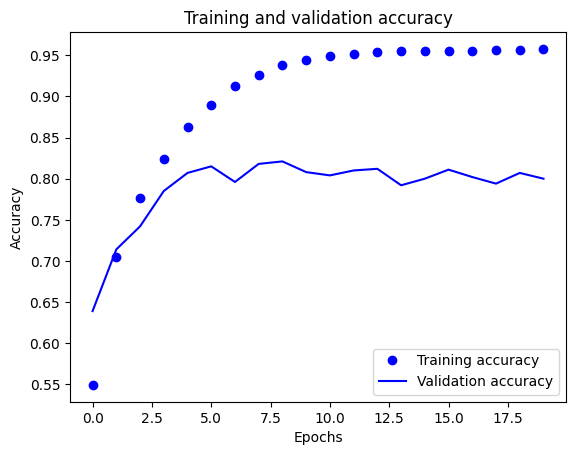

In [30]:
# plot training and validation accuracy
plt.clf()

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1, len(accuracy) + 1)

plt.plot(accuracy, 'bo', label='Training accuracy')
plt.plot(val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [32]:
# the point at which the line converges is a sign of training overfitting
# in this case, around 9 epochs

In [34]:
# rebuild and train model using only 9 epochs
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

model.fit(partial_x_train,
        partial_y_train,
        epochs=9,
        batch_size=512,
        validation_data=(x_val, y_val))

model_eval = model.evaluate(x_test, one_hot_test_labels)
f'loss and accuracy: {model_eval}'

Epoch 1/9
16/16 [==============================] - 1s 26ms/step - loss: 2.6612 - accuracy: 0.4698 - val_loss: 1.7152 - val_accuracy: 0.6430
Epoch 2/9
16/16 [==============================] - 0s 14ms/step - loss: 1.3965 - accuracy: 0.7120 - val_loss: 1.2797 - val_accuracy: 0.7300
Epoch 3/9
16/16 [==============================] - 0s 14ms/step - loss: 1.0219 - accuracy: 0.7925 - val_loss: 1.1036 - val_accuracy: 0.7780
Epoch 4/9
16/16 [==============================] - 0s 15ms/step - loss: 0.7960 - accuracy: 0.8312 - val_loss: 1.0017 - val_accuracy: 0.7950
Epoch 5/9
16/16 [==============================] - 0s 15ms/step - loss: 0.6320 - accuracy: 0.8626 - val_loss: 0.9420 - val_accuracy: 0.8040
Epoch 6/9
16/16 [==============================] - 0s 14ms/step - loss: 0.5068 - accuracy: 0.8958 - val_loss: 0.9247 - val_accuracy: 0.8010
Epoch 7/9
16/16 [==============================] - 0s 15ms/step - loss: 0.4065 - accuracy: 0.9173 - val_loss: 0.8847 - val_accuracy: 0.8140
Epoch 8/9
16/16 [===

'loss and accuracy: [0.9903295040130615, 0.7818343639373779]'

In [35]:
# using model to predict new data
predictions = model.predict(x_test)

71/71 [==============================] - 0s 937us/step


In [37]:
# each entry in predictions is a vector of length 46
predictions[0].shape

(46,)

In [38]:
# the most likely category in the first prediction
np.argmax(predictions[0])

3

In [39]:
# trying a different label encoding method, casting them as tensors (i.e, np arrays)
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [41]:
# this only changes the choice of the loss function, but the underlying math is the same
# categorical_crossentropy, expects the labels to follow a categorical encoding
# with integer labels, we use sparse_categorical_crossentropy
# is mathematically the same as categorical_crossentropy, it just has a different interface
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [42]:
# because the final outputs are 46-dimensional
# we should avoid intermediate layers with many fewer than 46 hidden units.
# here's a NN wit one layer having 4 units
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 12ms/step - loss: 2.8296 - accuracy: 0.2962 - val_loss: 2.0375 - val_accuracy: 0.5380
Epoch 2/20
63/63 [==============================] - 1s 9ms/step - loss: 1.6851 - accuracy: 0.5892 - val_loss: 1.5769 - val_accuracy: 0.6130
Epoch 3/20
63/63 [==============================] - 1s 8ms/step - loss: 1.3577 - accuracy: 0.6685 - val_loss: 1.4509 - val_accuracy: 0.6610
Epoch 4/20
63/63 [==============================] - 1s 8ms/step - loss: 1.1833 - accuracy: 0.7174 - val_loss: 1.4023 - val_accuracy: 0.6760
Epoch 5/20
63/63 [==============================] - 1s 9ms/step - loss: 1.0647 - accuracy: 0.7349 - val_loss: 1.3748 - val_accuracy: 0.6800
Epoch 6/20
63/63 [==============================] - 1s 9ms/step - loss: 0.9695 - accuracy: 0.7447 - val_loss: 1.3863 - val_accuracy: 0.6810
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 0.8921 - accuracy: 0.7621 - val_loss: 1.3600 - val_accuracy: 0.6920
Epoch 8/20
63/63 [=

In [ ]:
# it gets stuck at 0.87